Importing the Libraries

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error


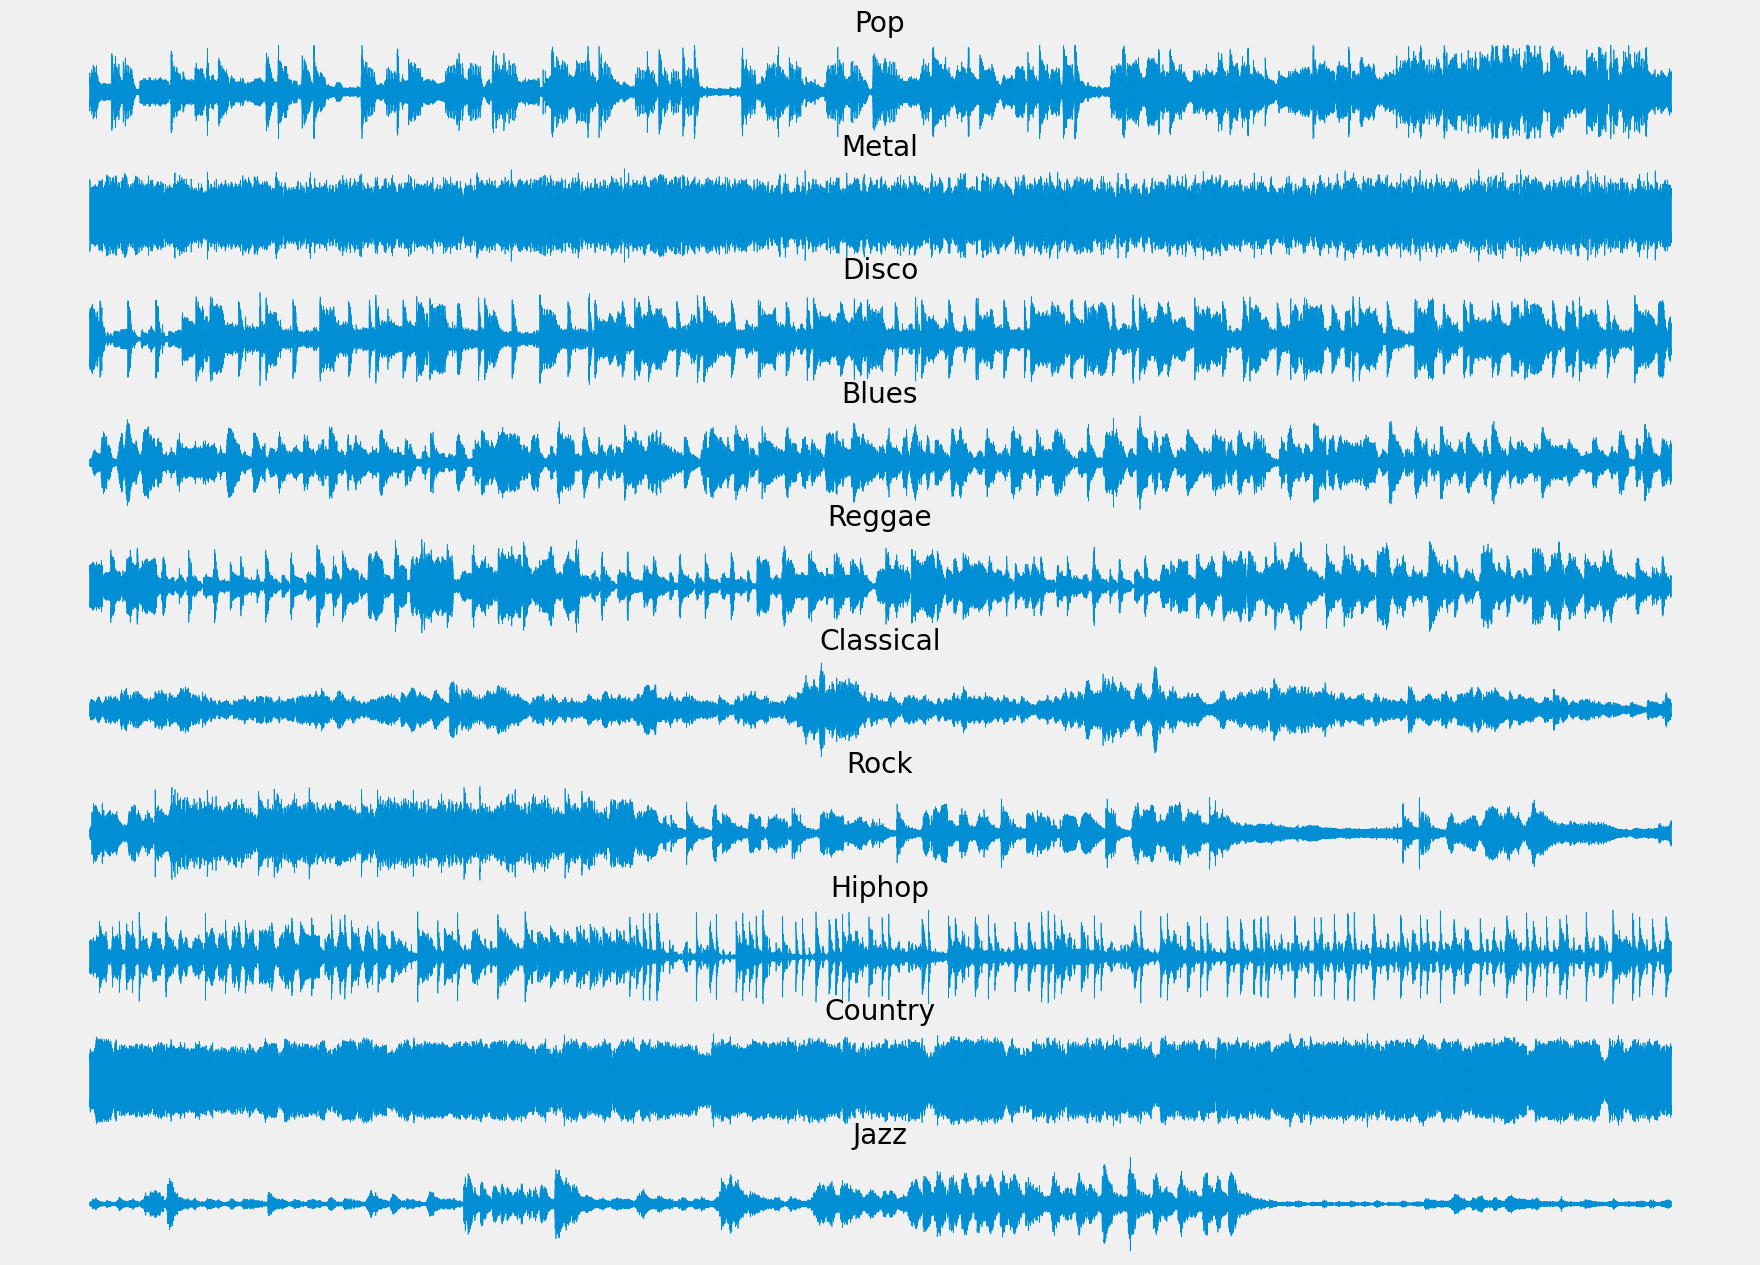

In [1]:
import numpy as np
import librosa#, librosa.display
from librosa import display
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json
import os
import math

labels=['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz'] #List of genres is dataset
wav_path = 'S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original' #Relative location of dataset
files=[] #Empty list to store audio filenames

for label in labels: #Iterating through all genres
    files.append(wav_path+'\\'+label+'\\'+label+'.00000.wav') #Adding first audio of each genre to files list

sounds=[] #Empty list to store audios
for file in files: #Iterating through stored filenames
    signal, sample_rate = librosa.load(file, sr=22050) #Loading audio as a numpy array and its sampling rate
    sounds.append(signal) #Adding loaded audio into sounds list
        
i = 1
fig = plt.figure(figsize=(20,15)) #Setting plot dimensions
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(10,1,i)
    librosa.display.waveshow(sound,sample_rate) #Plotting waveplot of loaded audio
    plt.title(n.title())
    plt.axis('off')
    i += 1
plt.show() 

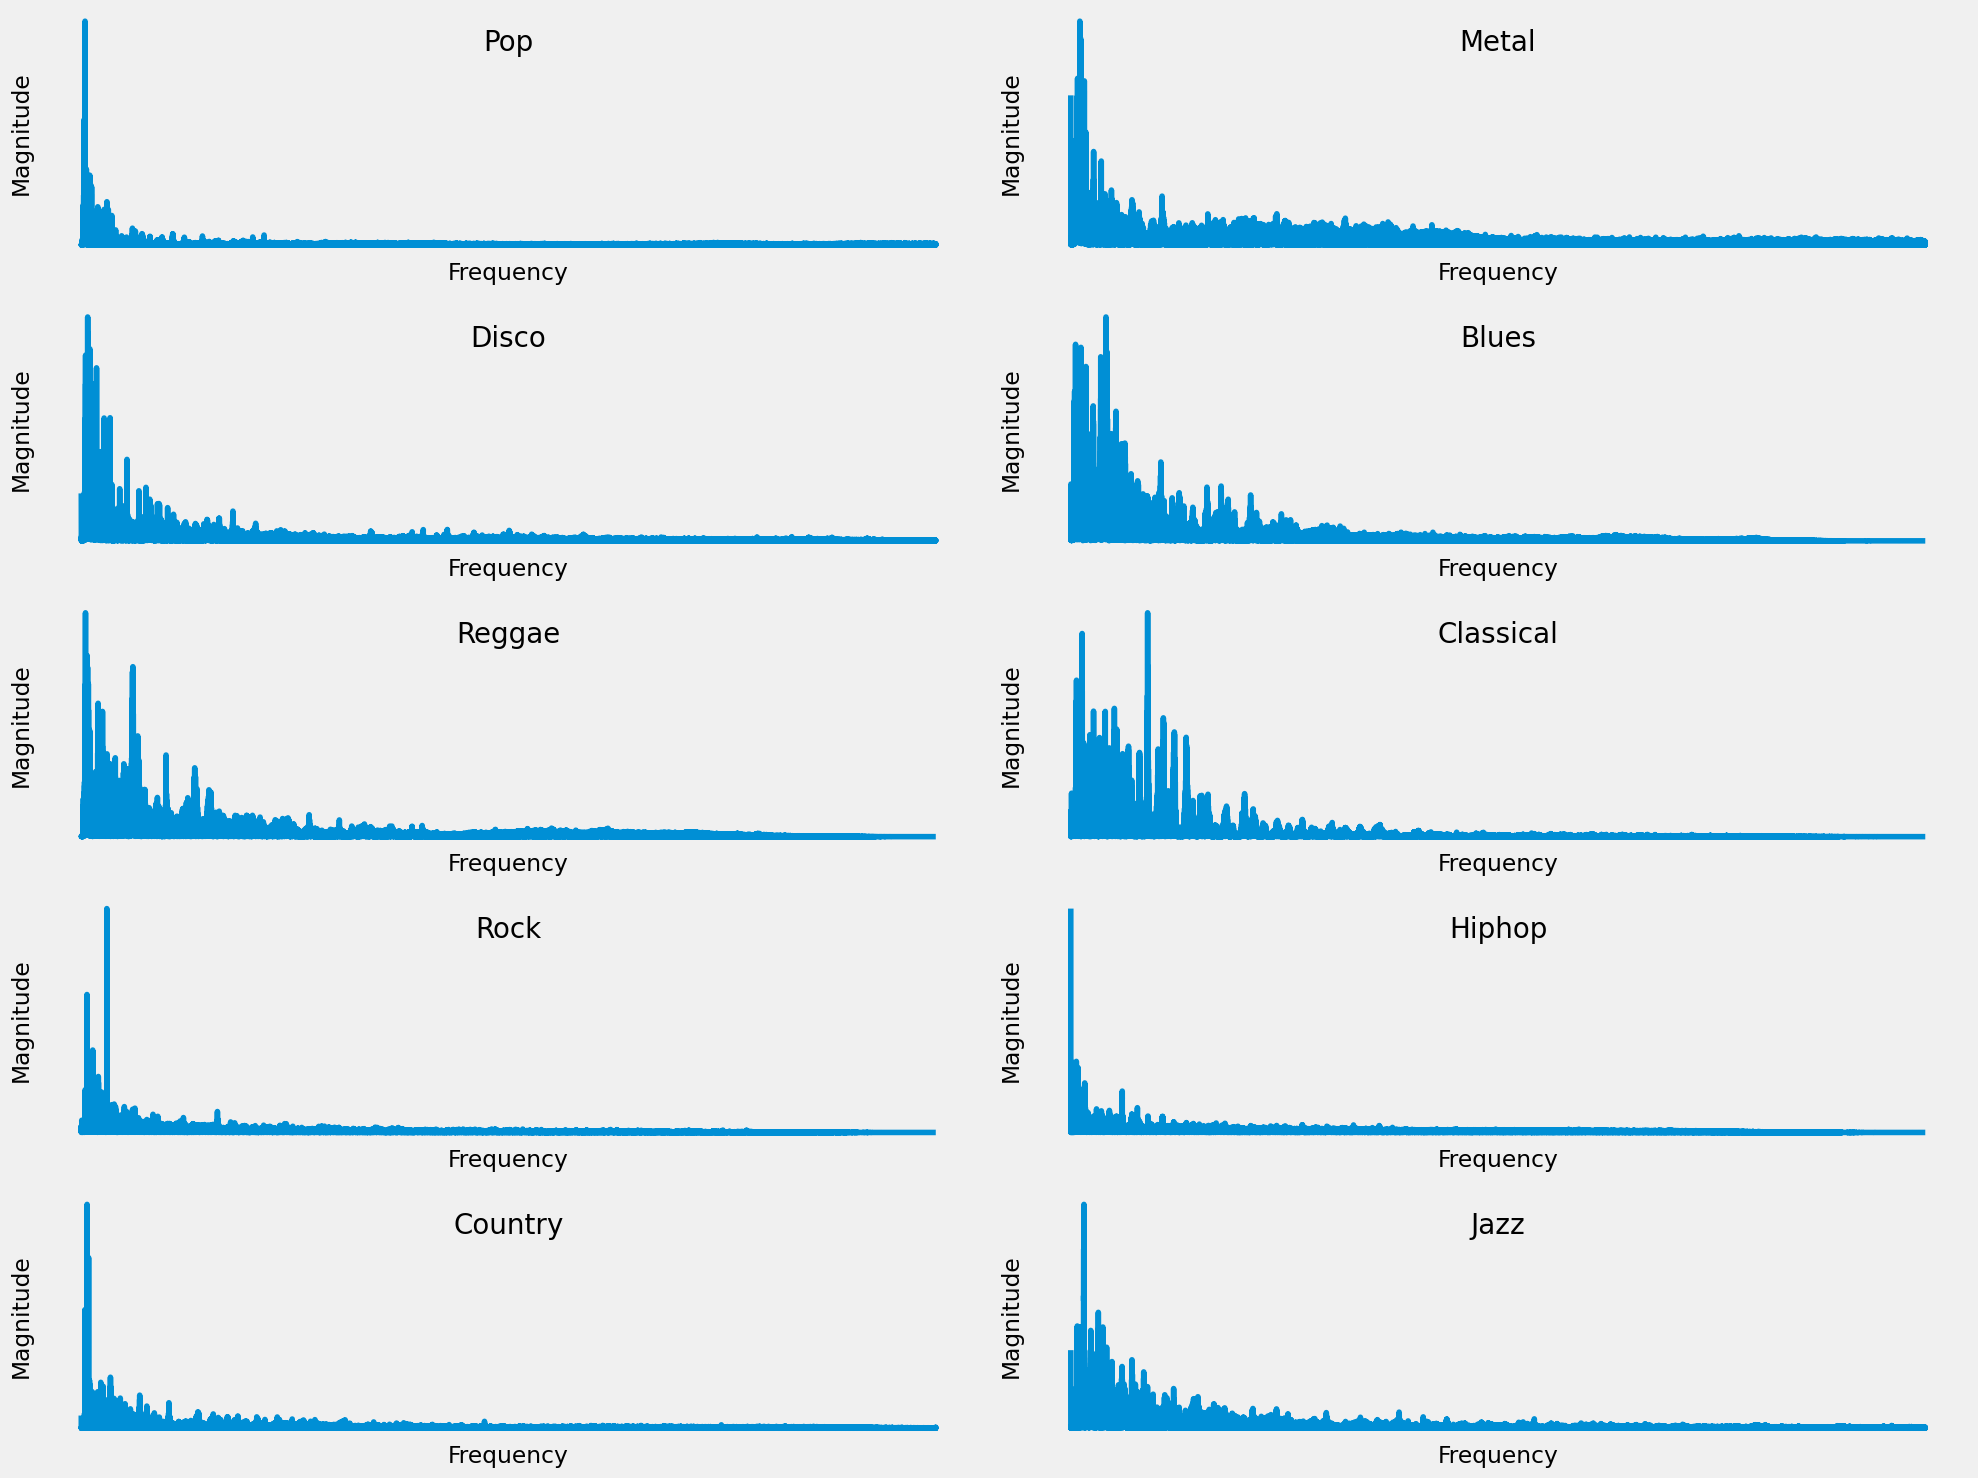

In [2]:
fig = plt.figure(figsize=(20,15)) #Setting plot dimensions
i=1
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(5,2,i)
    fft = np.fft.fft(sound) #Computes discrete fourier transform
    spectrum = np.abs(fft) #Considering only real part of fourier transform
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)] #Dividing frequency spectrum into half as it is a mirror image
    left_f = f[:int(len(spectrum)/2)] #Dividing frequency spectrum into half as it is a mirror image

    plt.plot(left_f, left_spectrum) #Plot frequency spectrum for loaded audio
    plt.title(n.title(), y=0.8, fontsize=20) #Title the plot as its genre
    plt.xticks(())
    plt.yticks(())
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    i += 1
    
plt.tight_layout()
plt.show()

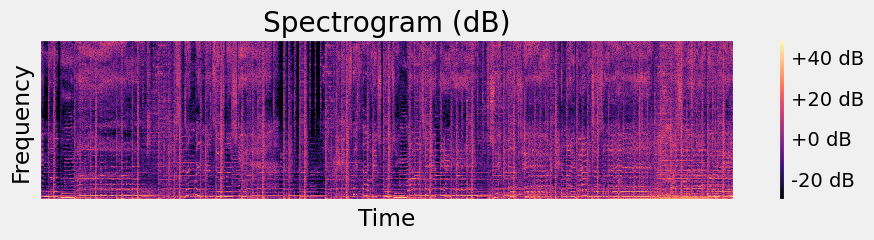

In [3]:
hop_length = 512 #number of audio samples between adjacent stft columns
n_fft = 2048 #length of the windowed signal after padding with zeros

stft = librosa.stft(sounds[0], n_fft=n_fft, hop_length=hop_length) #Computes Short-time Fourier transform (STFT)
spectrogram = np.abs(stft) #Considering only real part of stft
log_spectrogram = librosa.amplitude_to_db(spectrogram) #Convert an amplitude spectrogram to dB-scaled spectrogram.

plt.figure(figsize=(10,2)) #Setting plot dimensions
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)");

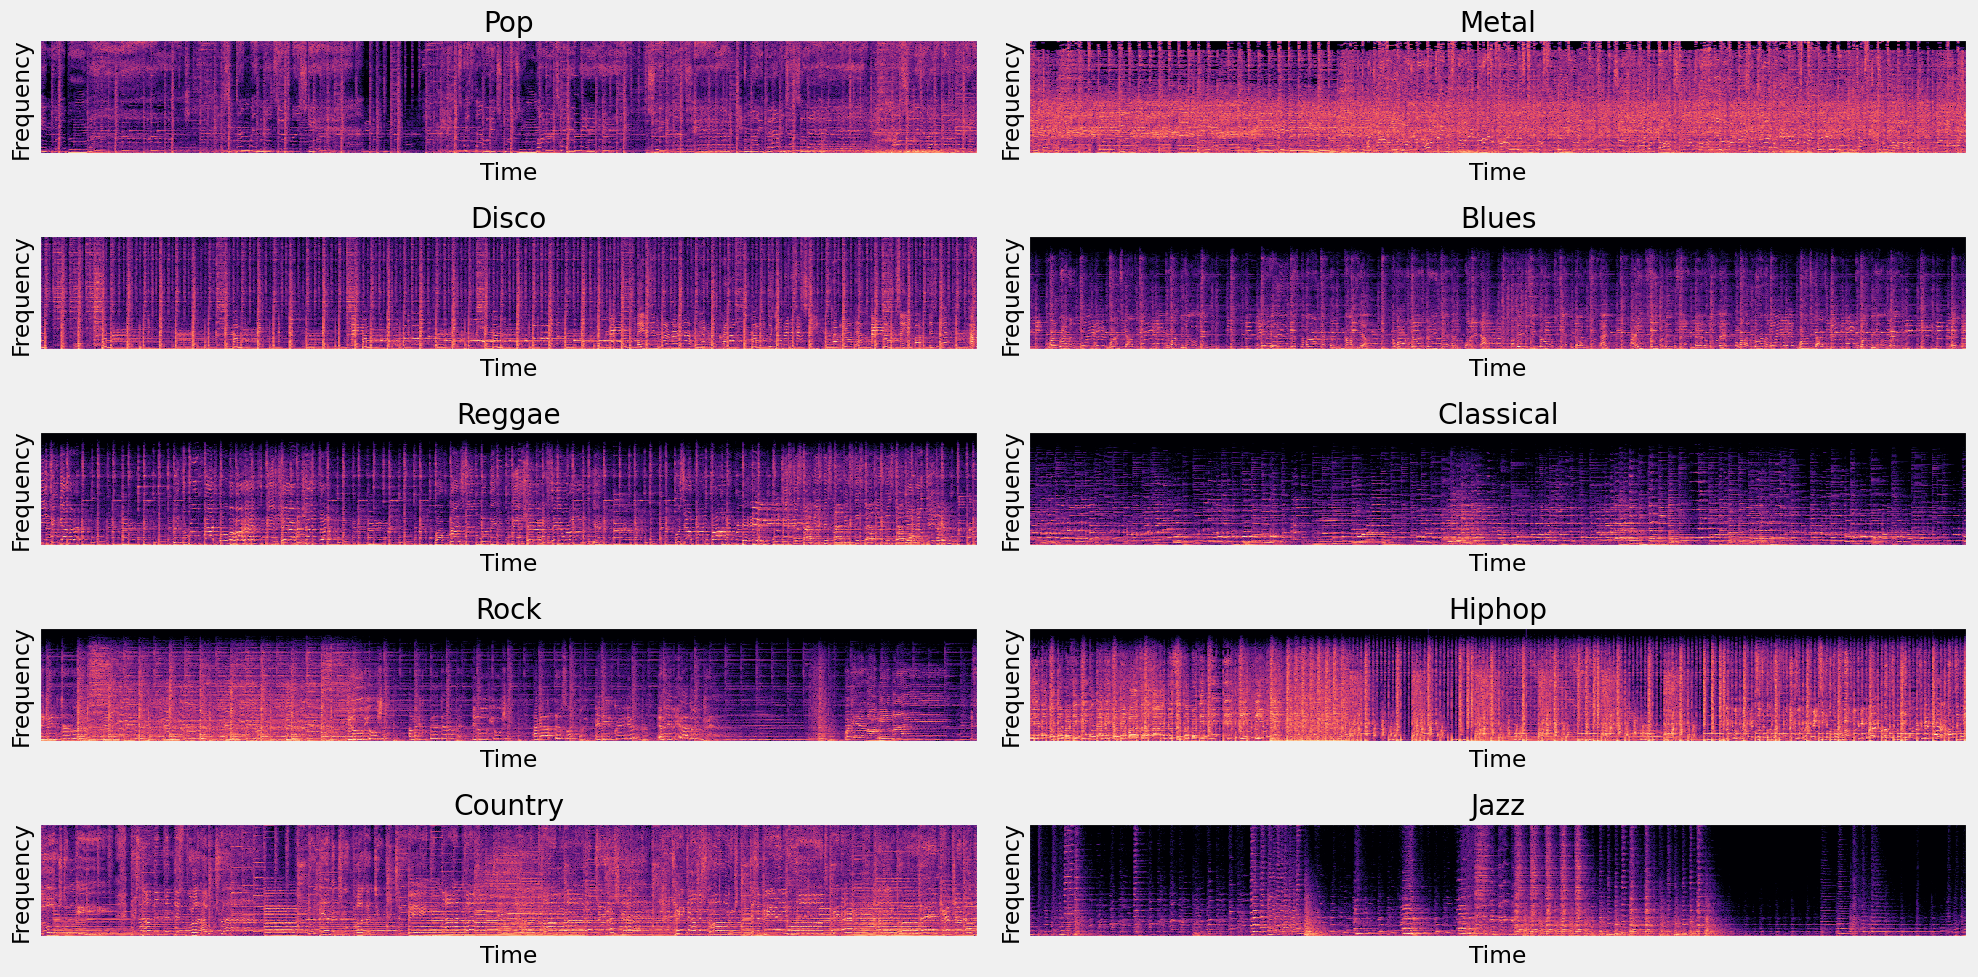

In [4]:
plt.figure(figsize=(20,10)) #Setting plot dimensions
i=1

for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    stft = librosa.stft(sound, n_fft=n_fft, hop_length=hop_length) #Computes Short-time Fourier transform (STFT)
    spectrogram = np.abs(stft) #Considering only real part of stft
    log_spectrogram = librosa.amplitude_to_db(spectrogram) #Convert an amplitude spectrogram to dB-scaled spectrogram.
    
    plt.subplot(5,2,i) 
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    i=i+1

plt.tight_layout()
plt.show()

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.00924683 -0.01177979 -0.01370239 ...  0.0071106   0.00561523
  0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


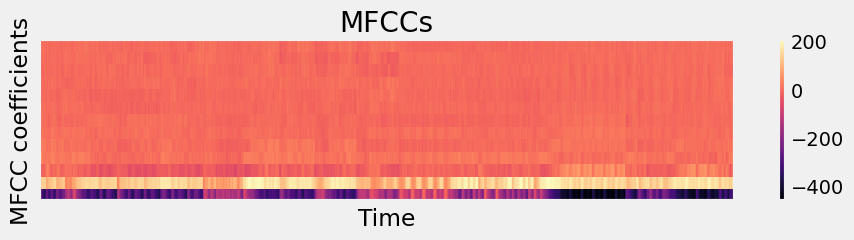

In [5]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) #Computes Mel-frequency cepstral coefficients (MFCCs)

plt.figure(figsize=(10,2)) #Setting plot dimensions
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[-0.0887146  -0.09524536 -0.10275269 ...  0.04016113  0.03860474
  0.02639771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[-0.12237549 -0.04919434  0.04440308 ... -0.17837524 -0.08401489
 -0.0284729 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[-0.23202515 -0.23168945 -0.1979065  ... -0.17419434 -0.14257812
 -0.10617065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:5: Fu

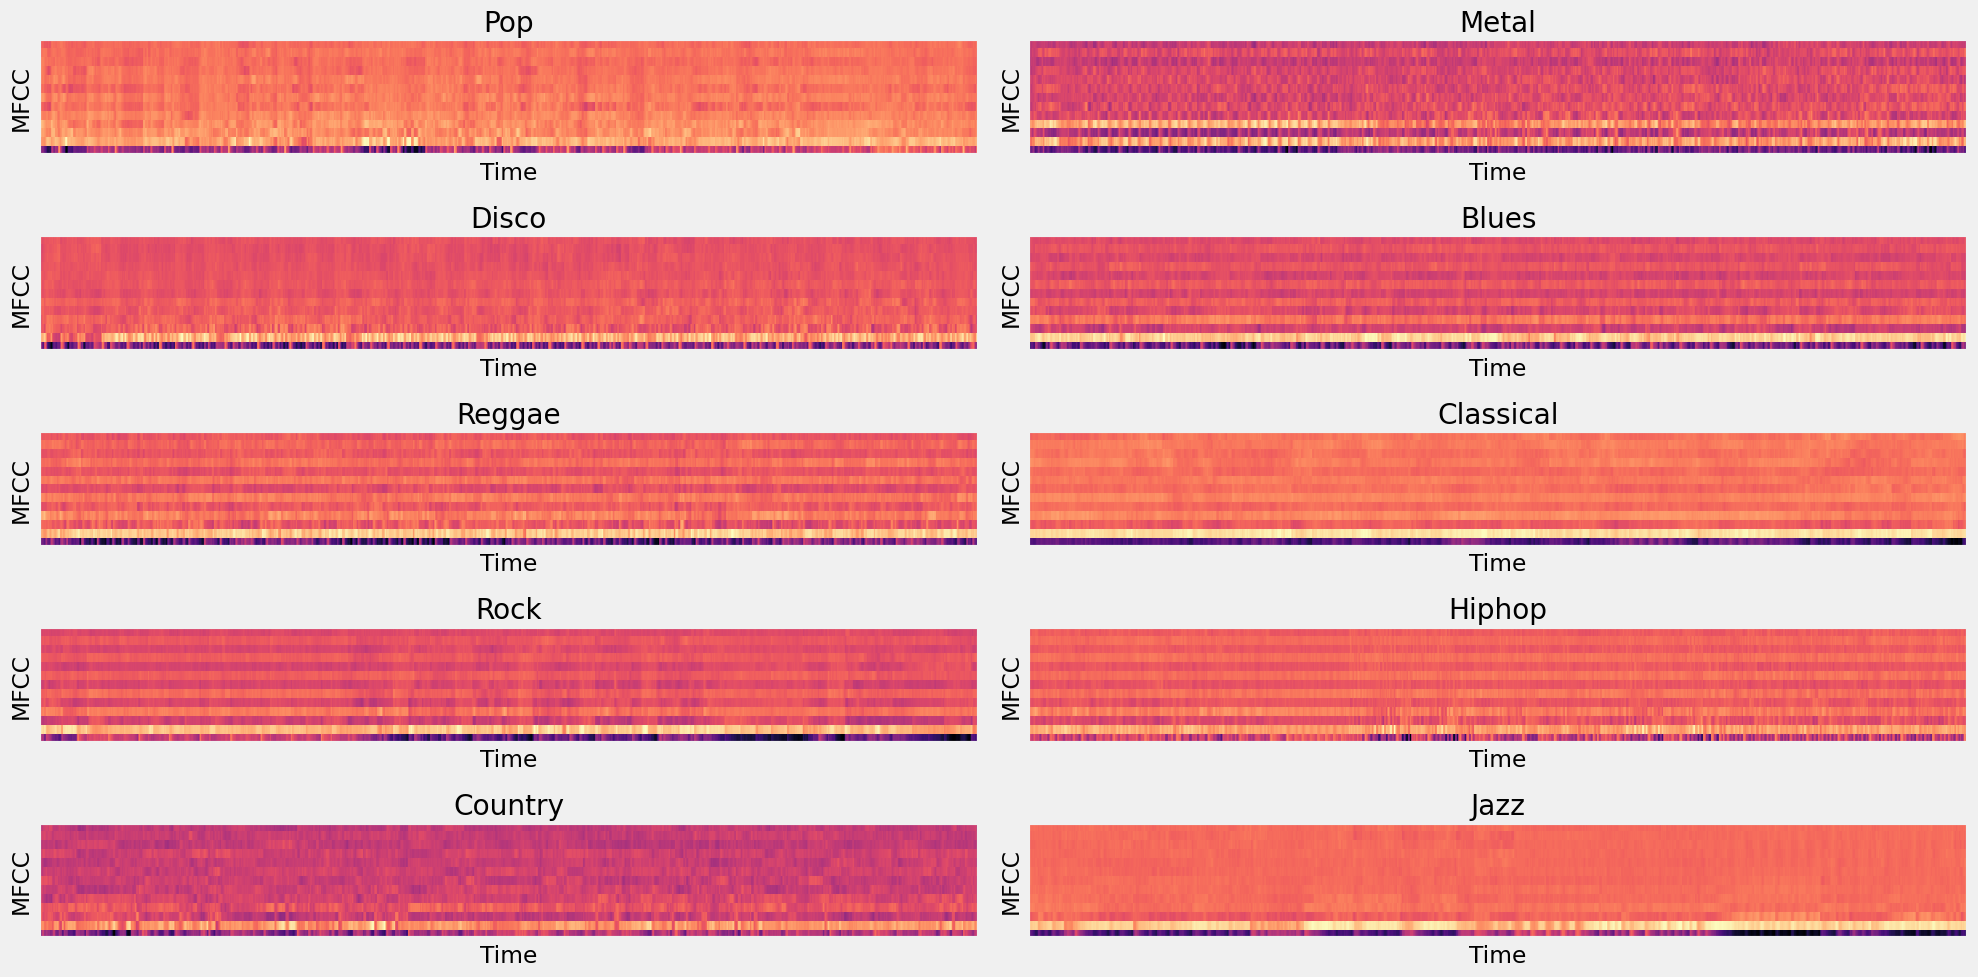

In [6]:
plt.figure(figsize=(20,10)) #Setting plot dimensions
i=1
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(5,2,i)
    MFCCs = librosa.feature.mfcc(sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) #Computes Mel-frequency cepstral coefficients (MFCCs)
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram

    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    i=i+1

plt.tight_layout()
plt.show()

In [7]:
samples_per_audio = sample_rate * 30 #Dataset has audio of 30 seconds duration
num_mfcc=13 #Number of MFCCs to be stores
num_segments=10 #Number of segments input audio is to be divided into

data = {
    "mapping": [],
    "labels": [],
    "mfcc": []
} #Dictionary to store filename, genre and the MFCCs of all audios

samples_per_segment = int(samples_per_audio / num_segments) #Number of samples in each segment
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) #Number of MFCCs stored in each segment

In [8]:
for i, (directory_path, _, filename) in enumerate(os.walk(wav_path)): #Iterating through all audios in dataset
    if directory_path is not wav_path:
        label = directory_path.split("/")[-1] #Storing genre name
        data["mapping"].append(label) #Adding genre name to the dictionary
        print("Processing: {}".format(label))
        
        for f in filename:
            file_path = os.path.join(directory_path, f) #Relative location of audio file
            signal, sample_rate = librosa.load(file_path, sr=sample_rate) #Loading audio as a numpy array and its sampling rate 
            
            for d in range(num_segments): #Iterating for each segment in audio
                start = samples_per_segment * d #Setting start of window to compute MFCCs
                finish = start + samples_per_segment #Setting end of window to compute MFCCs
                mfcc = librosa.feature.mfcc(signal[start:finish],
                                            sample_rate,
                                            n_mfcc=num_mfcc,
                                            n_fft=n_fft,
                                            hop_length=hop_length) #Computes Mel-frequency cepstral coefficients (MFCCs)
                mfcc = mfcc.T #Taking transpose of MFCCs
                
                if len(mfcc) == num_mfcc_vectors_per_segment: #If all MFCCs are extracted
                    data["mfcc"].append(mfcc.tolist()) #Storing MFCCs in dictionary
                    data["labels"].append(i-1) #Storing genre name in dictionary

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\blues


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.04373169 -0.05706787
 -0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02481079 -0.02005005 -0.0357666  ...  0.00918579  0.03964233
  0.09030151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06256104  0.02435303 -0.00405884 ...  0.2854004   0.29364014
  0.25228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00363159  0.00994873  0.01852417 ...  0.068573    0.07086182
  0.06643677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.06546021 0.06854248 0.07958984 ... 0.18441772 0.19055176 0.13772583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06890869  0.00338745 -0.0383606  ...  0.00439453  0.00033569
 -0.00268555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.20022583 0.21853638 0.23339844 ... 0.04049683 0.03656006 0.03482056], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03488159 0.03396606 0.02987671 ... 0.03451538 0.02645874 0.01678467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00671387 -0.00488281 -0.01498413 ...  0.02862549  0.02819824
  0.02709961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02706

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03256226 -0.03787231 -0.04083252 ...  0.16629028  0.14840698
  0.13131714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.16506958  0.17575073  0.1312561  ... -0.01132202 -0.00762939
 -0.00244141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0045166   0.00799561  0.00756836 ... -0.00686646 -0.01077271
 -0.00949097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00442505  0.00137329  0.00210571 ... -0.04815674 -0.0536499
 -0.05999756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06124878 -0.05874634 -0.05758667 ... -0.1651001  -0.1348877
 -0.01480103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.12030029  0.18106079  0.15670776 ...  0.00933838  0.01052856
 -0.00106812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05355835 -0.04937744 -0.04449463 ...  0.08175659  0.08074951
  0.07949829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0798645   0.07870483  0.07611084 ... -0.14645386 -0.14956665
 -0.1503601 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14703369 -0.14419556 -0.13623047 ... -0.10754395 -0.10464478
 -0.1038208 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02020264 -0.03634644 -0.02706909 ... -0.02493286 -0.01455688
 -0.00274658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01098633  0.0255127   0.03720093 ... -0.02584839 -0.027771
 -0.02996826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03042603 -0.0305481  -0.0328064  ... -0.02294922 -0.03448486
 -0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03918457 -0.10848999 -0.13619995 ... -0.05560303 -0.06256104
 -0.06582642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0552063   0.08731079  0.07107544 ... -0.1862793  -0.19216919
 -0.20202637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15322876 -0.1642456  -0.18130493 ...  0.16500854  0.1602478
  0.14996338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00646973 0.01831055 0.00061035 ... 0.02810669 0.03359985 0.05368042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.06256104 0.0614624  0.07455444 ... 0.0038147  0.05337524 0.07580566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.10281372  0.13494873  0.13720703 ... -0.07949829 -0.07904053
 -0.09335327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0827

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0585022   0.06088257  0.06231689 ... -0.07104492 -0.07290649
 -0.07589722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07714844 -0.07855225 -0.08178711 ...  0.15899658  0.18460083
  0.20370483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.18005371 0.17764282 0.19839478 ... 0.01473999 0.02261353 0.0324707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.11239624 0.14764404 0.11526489 ... 0.06692505 0.04278564 0.01086426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00796509 -0.0246582  -0.02514648 ... -0.11752319 -0.1298523
 -0.16323853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15841675 -0.1411438  -0.18984985 ... -0.05285645 -0.07473755
 -0.03741455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10806274 -0.15075684 -0.17327881 ... -0.18600464 -0.1602478
 -0.14117432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1496582  -0.14312744 -0.09814453 ...  0.17364502  0.1643982
  0.20370483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1685791   0.11795044  0.15774536 ... -0.04718018 -0.037323
 -0.03588867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08529663 -0.07669067 -0.06713867 ...  0.0027771  -0.00125122
 -0.00149536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06652832  0.09335327  0.04510498 ... -0.3310547  -0.330719
 -0.32977295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.36709595 -0.35079956 -0.34927368 ...  0.16326904  0.20404053
  0.22515869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.4861145  -0.5184021  -0.5223999  ... -0.17565918 -0.269104
 -0.15213013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00479126  0.05578613  0.12127686 ...  0.00314331 -0.00994873
 -0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01657104  0.00949097  0.03323364 ... -0.04354858 -0.08535767
 -0.09884644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11523438 -0.12982178 -0.11001587 ...  0.04165649 -0.07263184
 -0.13482666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.16952515 0.29315186 0.1512146  ... 0.03158569 0.0562439  0.0335083 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09140015  0.13760376  0.1048584  ...  0.07247925  0.06039429
 -0.00094604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06378174  0.08837891  0.04940796 ... -0.17300415 -0.1668396
 -0.1338501 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11422729 -0.09405518 -0.06939697 ...  0.05023193  0.0218811
  0.08239746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.07449341 0.00646973 0.00717163 ... 0.17831421 0.14227295 0.09799194], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.22402954 -0.19506836 -0.13900757 ... -0.00125122 -0.02047729
 -0.00314331], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02215576 -0.02536011 -0.0512085  ...  0.02349854  0.05160522
  0.10687256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11480713  0.10324097  0.11102295 ... -0.32226562 -0.2449646
 -0.18331909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13711548 -0.23635864 -0.2230835  ...  0.12353516  0.17803955
  0.19561768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.15301514  0.11621094  0.056427   ... -0.13574219 -0.09570312
 -0.03503418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00732422  0.00485229 -0.02145386 ... -0.35098267 -0.53027344
 -0.63235474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01687622 -0.23843384 -0.10067749 ... -0.05203247 -0.05853271
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08197021 -0.09082031 -0.06271362 ... -0.23248291 -0.20443726
 -0.19277954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15161133 -0.09164429 -0.12228394 ...  0.12731934  0.00177002
 -0.06906128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.25909424  0.48797607  0.5100403  ... -0.6972046  -0.6560364
 -0.61013794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.72836304 -0.7723999  -0.64160156 ...  0.02145386 -0.04727173
 -0.09634399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1555481  -0.17507935 -0.10205078 ...  0.15716553  0.11224365
  0.08099365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02090454  0.01016235  0.04364014 ...  0.0138855   0.03286743
  0.05349731], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.07223511 0.09100342 0.11190796 ... 0.17929077 0.18673706 0.18569946], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.1708374  0.15078735 0.14120483 ... 0.14328003 0.14523315 0.14627075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1439

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03161621  0.05133057  0.0489502  ... -0.09838867 -0.10220337
 -0.10653687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10998535 -0.1131897  -0.11697388 ... -0.08309937 -0.08514404
 -0.07598877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07089233 -0.08056641 -0.08807373 ... -0.04629517 -0.01879883
 -0.0255127 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 3.9672852e-03  1.2207031e-04  1.6662598e-02 ... -2.6373291e-01
 -2.5326538e-01 -2.5018311e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.25708008 -0.2576599  -0.25430298 ...  0.18457031  0.19354248
  0.19021606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.17858887  0.1640625   0.14733887 ...  0.01794434 -0.01211548
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\classical


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02008057 -0.01748657  0.00418091 ... -0.04797363 -0.04379272
 -0.03509521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02624512 -0.02224731 -0.02227783 ...  0.07336426  0.06396484
  0.05078125], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03265381  0.01266479 -0.00418091 ...  0.01239014  0.00537109
 -0.00042725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0083313  -0.02258301 -0.04367065 ...  0.06375122  0.01858521
 -0.03295898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08285522 -0.1274414  -0.15698242 ... -0.00198364 -0.00460815
 -0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00280762 0.01092529 0.015625   ... 0.00582886 0.01034546 0.00662231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01538086  0.02087402  0.01119995 ... -0.00112915 -0.00283813
 -0.00521851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00726318 -0.00863647 -0.00961304 ... -0.00811768 -0.00372314
  0.00408936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.01727295 0.02932739 0.03811646 ... 0.06347656 0.0630188  0.05380249], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00518799 -0.00723267 -0.00247192 ...  0.01412964  0.04232788
  0.04449463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 2.0385742e-02 -9.1552734e-05 -1.8127441e-02 ... -4.1259766e-02
 -5.0903320e-02 -5.2978516e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04541016 -0.03335571 -0.02059937 ... -0.01602173 -0.01754761
 -0.01907349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00158691  0.0038147   0.00643921 ... -0.00421143 -0.00418091
 -0.00387573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00396729 -0.00466919 -0.00408936 ...  0.00994873  0.00842285
  0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00201416 -0.00305176 -0.00259399 ...  0.00027466  0.00030518
  0.00039673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00823975 -0.00442505 -0.00820923 ...  0.05935669  0.05361938
  0.04269409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04150391  0.04812622  0.06860352 ... -0.05004883 -0.04708862
 -0.0435791 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01937866  0.00561523 -0.02761841 ... -0.18908691 -0.15853882
 -0.03735352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.15206909 0.17028809 0.16281128 ... 0.12805176 0.12719727 0.11206055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09558105  0.09060669  0.09268188 ... -0.02163696 -0.02618408
 -0.03225708], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07998657 -0.09335327 -0.0329895  ...  0.07876587  0.10873413
  0.13192749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05349731 -0.08444214 -0.07592773 ...  0.00491333  0.00280762
  0.00088501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00097656 -0.00289917 -0.00427246 ... -0.01235962 -0.02984619
 -0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05221558 -0.05767822 -0.06134033 ...  0.00479126  0.00827026
  0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01577759  0.03088379  0.03448486 ... -0.0451355  -0.02597046
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00967407 -0.00665283 -0.01699829 ... -0.06954956 -0.06494141
 -0.05065918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03057861 -0.01339722 -0.00494385 ... -0.00231934 -0.00213623
 -0.00219727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03503418  0.04135132  0.04904175 ... -0.0007019  -0.00106812
 -0.00109863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.10583496  0.12988281  0.04690552 ... -0.01086426 -0.01364136
 -0.01782227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01916504 -0.012146    0.00308228 ...  0.01464844  0.00811768
  0.00128174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-6.6223145e-03 -9.1857910e-03 -6.1035156e-03 ...  7.9345703e-04
 -9.1552734e-05 -9.7656250e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00158691 -0.00146484 -0.00036621 ...  0.00726318  0.00698853
  0.00421143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00064087 -0.00201416 -0.00320435 ... -0.00289917 -0.00354004
 -0.00341797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.01296997 0.01077271 0.0088501  ... 0.00897217 0.01028442 0.01068115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01040649  0.01022339  0.009552   ... -0.00067139 -0.00445557
 -0.00750732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00689697 -0.00558472 -0.00073242 ...  0.03182983  0.03274536
  0.03335571], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11593628 -0.15219116 -0.12042236 ...  0.17810059  0.16662598
  0.13830566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.12503052  0.1418457   0.17346191 ... -0.29351807 -0.29467773
 -0.30361938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2783203  -0.23355103 -0.17758179 ...  0.02178955 -0.02770996
 -0.09225464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06484985 -0.10720825 -0.10943604 ...  0.04418945  0.03881836
  0.03411865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06964111  0.04953003  0.04092407 ... -0.03903198 -0.03082275
 -0.02368164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02059937 -0.0222168  -0.03411865 ... -0.12902832 -0.13989258
 -0.10723877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01312256 -0.01367188 -0.01391602 ...  0.0010376   0.00054932
  0.00067139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00094604  0.00091553  0.00097656 ... -0.01544189 -0.01321411
 -0.00918579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00674438 -0.00592041 -0.00714111 ... -0.01208496 -0.01303101
 -0.01364136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03042603 -0.02200317 -0.02359009 ... -0.02212524 -0.02526855
 -0.03121948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03198242 -0.03085327 -0.03268433 ...  0.05111694  0.0357666
  0.02844238], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02319336  0.02288818  0.02407837 ... -0.13110352 -0.14242554
 -0.1531372 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00131226  0.00128174  0.00131226 ... -0.02819824 -0.02700806
 -0.02572632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02471924 -0.02349854 -0.02297974 ... -0.00640869 -0.00836182
 -0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01193237 -0.01379395 -0.01589966 ...  0.03778076  0.04721069
  0.05563354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.3317566  -0.356781   -0.36080933 ... -0.05459595 -0.05361938
 -0.052948  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05111694 -0.04949951 -0.04568481 ...  0.09793091  0.07836914
  0.0562439 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01068115  0.03204346  0.05667114 ... -0.00546265 -0.03747559
 -0.05966187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00265503  0.00259399  0.00332642 ... -0.02072144 -0.02639771
 -0.02874756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02844238 -0.02722168 -0.0262146  ... -0.00280762 -0.00418091
 -0.00588989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00601196 0.00238037 0.00372314 ... 0.02392578 0.02163696 0.01766968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02120972 -0.02462769 -0.02346802 ...  0.00134277  0.0007019
  0.00024414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00167847 0.00262451 0.00344849 ... 0.00262451 0.00247192 0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00231934 0.00241089 0.00247192 ... 0.00344849 0.00396729 0.00454712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00518

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02630615  0.02297974  0.01797485 ... -0.04733276 -0.04226685
 -0.03631592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03048706 -0.02496338 -0.02020264 ...  0.02081299  0.02316284
  0.02542114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02752686  0.02911377  0.03039551 ... -0.07327271 -0.07577515
 -0.07635498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0078125  -0.00787354 -0.00775146 ... -0.00085449  0.
  0.0012207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00238037  0.00372314  0.00491333 ...  0.01004028  0.00509644
 -0.00106812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00634766 -0.0100708  -0.01220703 ... -0.05160522 -0.05130005
 -0.05062866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00045776 -0.00531006  0.00509644 ... -0.00909424 -0.00808716
 -0.01037598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.03094482  0.0329895
  0.03622437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.04470825 0.05090332 0.04519653 ... 0.09585571 0.09942627 0.08010864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08078003 -0.09741211 -0.0390625  ...  0.03045654  0.04415894
  0.0319519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00683594 -0.05230713 -0.08096313 ...  0.03341675  0.07299805
  0.11425781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.14846802  0.1524353   0.10995483 ... -0.06878662 -0.06228638
 -0.04977417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00140381 -0.0020752  -0.00579834 ... -0.00674438 -0.00491333
 -0.00311279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00497437 0.00491333 0.00244141 ... 0.01071167 0.01208496 0.01419067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01608276  0.01617432  0.01721191 ... -0.00299072  0.00131226
  0.00344849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\country


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.21350098  0.1982727   0.17263794 ... -0.3067627  -0.20651245
 -0.27694702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23529053 -0.2796936  -0.25787354 ... -0.28155518 -0.299469
 -0.1986084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.19793701 -0.2713318  -0.15911865 ... -0.03131104 -0.0229187
  0.14492798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.41488647  0.2640381   0.2265625  ... -0.14529419 -0.14648438
 -0.22033691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13513184 -0.21115112 -0.18182373 ...  0.6419983   0.4689331
  0.32070923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.28396606  0.1984253   0.19369507 ... -0.18414307 -0.10528564
 -0.09231567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.13180542  0.02697754 -0.1199646  ... -0.0267334  -0.0289917
 -0.06832886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.12097168 0.197052   0.2942505  ... 0.05917358 0.05807495 0.05844116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.05743408  0.03924561  0.02166748 ... -0.01486206 -0.01544189
  0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03726196  0.02981567  0.02386475 ... -0.12149048 -0.12753296
 -0.1348877 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14474487 -0.15213013 -0.1569519  ...  0.10253906  0.09768677
  0.09231567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0869751  0.08117676 0.07632446 ... 0.07073975 0.07327271 0.07867432], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02996826  0.01235962 -0.01443481 ...  0.03317261  0.02706909
  0.02337646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09390259  0.09164429  0.09054565 ... -0.2874756  -0.25579834
 -0.24331665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23144531 -0.23898315 -0.22561646 ...  0.1078186   0.16949463
  0.24502563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03100586 -0.03363037 -0.03677368 ... -0.0362854  -0.03005981
 -0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02050781 -0.01730347 -0.01455688 ...  0.04046631  0.04324341
  0.04534912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04733276  0.04797363  0.04840088 ... -0.13748169 -0.14111328
 -0.14395142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00238037  0.00979614  0.01742554 ...  0.06100464  0.0453186
  0.05337524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02224731 -0.0241394  -0.02676392 ...  0.00692749  0.01461792
  0.01693726], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02017212 0.02456665 0.03103638 ... 0.08087158 0.06790161 0.05853271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00280762 -0.01260376 -0.01239014 ...  0.01425171  0.003479
 -0.00418091], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02297974 -0.02987671 -0.04003906 ...  0.01086426 -0.08023071
 -0.09945679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05462646 -0.1300354  -0.1281128  ...  0.05374146  0.04550171
  0.04266357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02249146  0.03356934  0.04592896 ... -0.00213623 -0.00494385
 -0.00177002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00613403 -0.012146   -0.00753784 ...  0.05712891  0.04299927
  0.03820801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03326416 0.0302124  0.03433228 ... 0.10900879 0.14181519 0.12573242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06491089  0.05664062  0.0802002  ... -0.13568115 -0.12664795
 -0.1161499 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.16696167 -0.21401978 -0.17111206 ... -0.01599121 -0.03930664
 -0.03530884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03494263 -0.01211548 -0.01055908 ... -0.3892212  -0.43048096
 -0.3972168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01055908 -0.01712036 -0.02111816 ...  0.06799316  0.06332397
  0.05935669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0581665  0.06356812 0.07687378 ... 0.10720825 0.06835938 0.02194214], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03933716 -0.04574585 -0.00396729 ...  0.03695679  0.11074829
  0.15679932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01470947 -0.02044678 -0.0173645  ...  0.04833984  0.04348755
  0.04180908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04391479  0.04415894  0.03994751 ... -0.00497437 -0.00256348
  0.00164795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00750732  0.01379395  0.01715088 ... -0.05517578 -0.05020142
 -0.04553223], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05865479 -0.02615356  0.06219482 ...  0.02105713  0.0826416
  0.11038208], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0932312  0.03945923 0.00686646 ... 0.00152588 0.00289917 0.00280762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00369263 0.00570679 0.00668335 ... 0.05410767 0.0925293  0.12823486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.13815

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00164795 -0.00827026 -0.02133179 ... -0.0480957  -0.02563477
 -0.02410889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00018311  0.0579834   0.08291626 ...  0.02932739  0.06274414
  0.08401489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.078125   0.06994629 0.03921509 ... 0.11340332 0.1489563  0.1543274 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06756592  0.04852295  0.02886963 ... -0.0135498  -0.01092529
 -0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00317383  0.00024414  0.00338745 ... -0.12609863 -0.10720825
 -0.10900879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.12310791 -0.13214111 -0.12341309 ... -0.00671387 -0.0065918
 -0.00650024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08029175  0.14419556  0.16375732 ... -0.03521729 -0.04663086
 -0.05310059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03601074 -0.01525879  0.00036621 ... -0.0194397  -0.03390503
 -0.05722046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06488037 -0.05218506 -0.02639771 ...  0.02481079  0.02282715
  0.02539062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.07885742 0.16244507 0.17645264 ... 0.41418457 0.35681152 0.2730713 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.18371582  0.07659912 -0.02975464 ... -0.14807129 -0.174469
 -0.17425537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14904785 -0.13897705 -0.13900757 ... -0.25115967 -0.19824219
 -0.16867065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00967407 -0.02975464 -0.04034424 ... -0.23300171 -0.22903442
 -0.19833374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03414917 -0.04208374 -0.02587891 ...  0.0213623   0.02441406
  0.0256958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02740479  0.03088379  0.03591919 ... -0.00326538 -0.00198364
 -0.0067749 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1602478   0.2104187   0.2616577  ... -0.08758545 -0.10238647
 -0.10424805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.12509155 -0.15939331 -0.15570068 ... -0.04919434 -0.13400269
 -0.19995117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.25057983 -0.28546143 -0.27868652 ...  0.08120728  0.09054565
  0.08374023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.08981323 0.09619141 0.10574341 ... 0.07723999 0.11044312 0.17059326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.25256348  0.33987427  0.39743042 ...  0.06100464  0.00866699
 -0.05950928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05899048 -0.0944519  -0.07345581 ...  0.08773804  0.08428955
  0.08209229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1920166   0.17956543  0.13195801 ... -0.09960938 -0.24868774
 -0.3079834 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02001953  0.02398682  0.02020264 ... -0.02804565 -0.04177856
 -0.04940796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04550171 -0.03619385 -0.03500366 ...  0.0473938   0.17172241
  0.23291016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.05450439 0.07009888 0.08566284 ... 0.14727783 0.1404419  0.13934326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.16079712  0.19226074  0.20227051 ... -0.0534668  -0.07531738
 -0.11810303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.17755127 -0.2388916  -0.15670776 ... -0.05838013 -0.05380249
 -0.03952026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\disco


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23202515 -0.23168945 -0.1979065  ... -0.05249023 -0.07598877
 -0.08093262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08651733 -0.09222412 -0.11990356 ... -0.09854126 -0.03106689
 -0.17108154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.19763184 -0.07788086 -0.2268982  ...  0.04376221  0.02697754
  0.02526855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.336792   -0.18792725 -0.21746826 ...  0.18270874  0.09332275
  0.00396729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.050354   -0.15368652 -0.20471191 ... -0.1746521  -0.13848877
  0.00198364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.12030029  0.10690308 -0.00842285 ...  0.18145752  0.190979
  0.19021606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0144043   0.01528931  0.03204346 ... -0.40304565 -0.23510742
 -0.13647461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.19967651 -0.10507202 -0.08612061 ... -0.26620483 -0.29214478
 -0.2406311 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08761597 -0.0138855  -0.08514404 ... -0.0284729  -0.07693481
 -0.08404541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.24008179 0.1802063  0.11660767 ... 0.29830933 0.4326477  0.24780273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04257202 -0.09124756 -0.06265259 ... -0.26852417 -0.3453064
 -0.08795166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.28500366  0.3552246   0.35714722 ... -0.01754761 -0.12686157
 -0.20095825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.13900757  0.17373657  0.18908691 ... -0.41671753 -0.39367676
 -0.32424927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.24136353 -0.16900635 -0.08721924 ... -0.0413208  -0.3026123
 -0.21078491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.06985474 0.09182739 0.1703186  ... 0.17599487 0.15579224 0.10629272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.36166382 -0.27856445 -0.19082642 ... -0.32876587 -0.250885
 -0.10949707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00085449 -0.00628662 -0.01074219 ... -0.0715332  -0.04348755
  0.0199585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03439331  0.01861572 -0.01596069 ...  0.24194336  0.23660278
  0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.20605469  0.26940918  0.27938843 ... -0.04959106 -0.06491089
 -0.07614136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03063965  0.02542114  0.02191162 ... -0.08273315 -0.10269165
 -0.10391235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08300781 -0.06784058 -0.08728027 ... -0.07531738 -0.08743286
 -0.08309937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00692749  0.04525757  0.07388306 ...  0.2416687  -0.10406494
  0.21350098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00473022 -0.10455322  0.07418823 ... -0.11633301 -0.04962158
 -0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10241699 -0.06164551 -0.11993408 ...  0.2802124   0.23913574
  0.15032959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14508057 -0.17297363 -0.10879517 ... -0.11914062 -0.14196777
 -0.00445557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08514404 -0.08752441 -0.09707642 ... -0.08532715  0.10284424
 -0.12145996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00250244 -0.09527588  0.02069092 ... -0.09457397 -0.04003906
  0.05667114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04244995  0.08584595 -0.00479126 ...  0.25045776  0.23971558
  0.17388916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1055603   0.05288696  0.01809692 ... -0.06451416 -0.05145264
 -0.03356934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01556396  0.01873779  0.04666138 ...  0.16989136  0.15579224
  0.11938477], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02481079  0.00900269  0.02313232 ... -0.04544067 -0.10333252
 -0.10314941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08786011 -0.04992676 -0.02801514 ...  0.03604126  0.04943848
  0.03790283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.05148315  0.02331543  0.04855347 ... -0.08578491 -0.08230591
 -0.08602905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.23718262  0.10021973 -0.30282593 ...  0.2135315   0.13769531
  0.04055786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03881836 -0.18054199 -0.29559326 ...  0.49765015  0.5082092
  0.52124023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.47494507  0.4246521   0.3944397  ... -0.01025391 -0.0211792
 -0.02883911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23043823 -0.23434448 -0.18685913 ... -0.03500366 -0.04989624
 -0.04449463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04333496 -0.01669312  0.00372314 ... -0.13534546 -0.16238403
 -0.29467773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.4239502  -0.42538452 -0.32833862 ...  0.05801392  0.00772095
 -0.06762695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04418945 -0.03817749 -0.0229187  ... -0.04058838 -0.04284668
 -0.04421997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0486145  -0.05361938 -0.05953979 ... -0.06570435 -0.05047607
 -0.05526733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07650757 -0.06243896 -0.02987671 ...  0.00463867 -0.00588989
  0.01895142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03607178 -0.10568237 -0.20123291 ... -0.00183105 -0.01763916
 -0.06237793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07928467 -0.09173584 -0.08691406 ... -0.5579529  -0.6107483
 -0.64404297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.4236145  -0.5303345  -0.6585388  ... -0.25772095 -0.24771118
 -0.23867798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.25924683 0.25967407 0.4003601  ... 0.32061768 0.15982056 0.25204468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03314209  0.00604248  0.03399658 ... -0.00616455 -0.01028442
 -0.00982666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00906372 -0.01364136 -0.01513672 ... -0.05645752 -0.00732422
 -0.01303101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0435791  0.04830933 0.0553894  ... 0.05783081 0.04626465 0.05361938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01852417 -0.01733398  0.1116333  ...  0.00933838 -0.00259399
  0.01574707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03591919  0.00460815  0.00540161 ... -0.24133301 -0.13946533
 -0.03814697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03637695 0.00521851 0.04821777 ... 0.09863281 0.07608032 0.05670166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.04519653 0.02801514 0.03094482 ... 0.02246094 0.03067017 0.06799316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02624512 -0.03271484  0.00714111 ...  0.05905151  0.09066772
  0.15014648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.2113

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.33618164 -0.27212524 -0.21710205 ...  0.05661011  0.02804565
 -0.01626587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04815674 -0.08392334 -0.12097168 ...  0.10903931  0.15280151
  0.18869019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02081299  0.08752441  0.06787109 ... -0.0559082  -0.00137329
  0.03582764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00482178 -0.00036621 -0.00552368 ... -0.07125854 -0.05627441
 -0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02050781 -0.02755737 -0.05023193 ... -0.04653931 -0.0333252
 -0.01461792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11407471  0.0262146  -0.08010864 ... -0.15490723 -0.17770386
 -0.23434448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15551758 -0.16552734 -0.20318604 ... -0.09671021 -0.04519653
  0.00186157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0017395  -0.04336548 -0.0753479  ... -0.03768921 -0.17330933
 -0.2554016 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.16619873 0.12957764 0.10116577 ... 0.00585938 0.037323   0.02752686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02404785  0.06408691  0.07891846 ... -0.14324951 -0.21679688
 -0.26864624], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.3580017  -0.394104   -0.23831177 ...  0.00146484  0.04525757
  0.02798462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01382446  0.01873779 -0.01834106 ...  0.01605225  0.05792236
 -0.0138855 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.1578064  0.21792603 0.27825928 ... 0.03982544 0.04602051 0.04336548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0178833  -0.02145386 -0.06845093 ...  0.08651733  0.08413696
  0.06610107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.05303955  0.05197144  0.05160522 ...  0.06201172  0.07632446
 -0.01547241], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\hiphop


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.07229614  0.11206055
  0.05499268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03643799  0.0725708   0.09326172 ... -0.19229126 -0.13232422
  0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01312256 -0.10766602 -0.07131958 ... -0.14120483 -0.02423096
  0.07196045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00750732  0.20883179  0.04766846 ... -0.05090332 -0.09118652
 -0.04272461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08187866 -0.1086731  -0.08828735 ...  0.00878906  0.01809692
  0.03173828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03881836 0.03945923 0.04840088 ... 0.17166138 0.14816284 0.14801025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00064087 -0.00097656  0.00247192 ... -0.04174805 -0.11434937
 -0.10400391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0531311   0.0007019   0.02853394 ...  0.17562866  0.065979
  0.09326172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.19815063  0.24581909  0.09854126 ...  0.10366821  0.08096313
 -0.01782227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.10507202 0.07922363 0.06140137 ... 0.11334229 0.10574341 0.12380981], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.19445801 -0.27301025 -0.16564941 ...  0.06311035  0.00430298
  0.08108521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.21905518  0.08682251 -0.01071167 ...  0.1048584   0.11434937
  0.09295654], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08630371 -0.06707764 -0.04684448 ... -0.26086426 -0.22991943
 -0.18383789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05807495  0.00198364 -0.03381348 ... -0.04666138 -0.02474976
  0.00735474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02703857  0.0335083   0.01422119 ... -0.00839233 -0.01046753
 -0.01675415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02133179 -0.081604   -0.08023071 ... -0.78219604 -0.6285095
 -0.39794922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.20135498 -0.03717041  0.06384277 ... -0.11752319 -0.2298584
 -0.22753906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.24743652 -0.32073975 -0.24353027 ...  0.12820435  0.09112549
  0.08010864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.37893677 -0.6002197  -0.5111084  ... -0.10467529 -0.08459473
 -0.16622925], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.29953003 -0.33880615 -0.22445679 ... -0.49627686 -0.50057983
 -0.47579956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.45803833 -0.4623108  -0.4429016  ... -0.04296875 -0.03851318
 -0.05804443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13723755 -0.13070679 -0.12982178 ...  0.04470825  0.03796387
  0.04226685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.04437256 0.03787231 0.02999878 ... 0.24215698 0.21224976 0.20587158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.18255615  0.21258545  0.25982666 ... -0.04705811 -0.04180908
 -0.01922607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.29486084  0.30841064  0.42001343 ... -0.24551392 -0.19625854
 -0.10476685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06106567  0.0713501   0.18304443 ... -0.08303833 -0.06481934
 -0.04544067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03317261 -0.02746582 -0.03009033 ...  0.3685913   0.24450684
  0.27017212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02316284  0.04391479 -0.14691162 ... -0.16323853  0.04638672
  0.1427002 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.12451172 -0.14508057 -0.24133301 ...  0.0111084   0.03582764
  0.01925659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0112915   0.01721191  0.03378296 ... -0.0045166  -0.05276489
  0.06210327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0664978  -0.07513428
 -0.07614136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06124878 -0.05801392 -0.08563232 ... -0.4303894  -0.3802185
 -0.33441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2895813  -0.26123047 -0.24349976 ...  0.04406738 -0.02600098
 -0.06365967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00244141 -0.00192261 -0.0020752  ... -0.06616211 -0.05371094
 -0.04602051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06591797 -0.08480835 -0.06378174 ... -0.01364136 -0.01443481
 -0.01300049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01583862 -0.01544189 -0.01495361 ...  0.04174805  0.03781128
  0.01809692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00500488 -0.00332642 -0.00518799 ... -0.14761353 -0.16473389
 -0.13665771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13342285 -0.1600647  -0.17874146 ... -0.07171631 -0.06652832
 -0.06369019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06430054 -0.06161499 -0.05758667 ... -0.00631714  0.00192261
  0.01696777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08734131  0.08816528  0.08764648 ...  0.0317688   0.03909302
 -0.01080322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04946899 -0.04019165  0.0305481  ... -0.0501709  -0.0475769
 -0.05099487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05523682 -0.05801392 -0.06237793 ... -0.06008911 -0.02331543
 -0.04541016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03295898 0.15820312 0.18359375 ... 0.03527832 0.04418945 0.04403687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.05786133 0.07754517 0.08062744 ... 0.05175781 0.11175537 0.1251831 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07592773  0.06219482  0.05215454 ... -0.01913452 -0.03677368
 -0.11578369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2465

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04309082 -0.0267334  -0.01153564 ... -0.22235107 -0.2590027
 -0.25387573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23687744 -0.23266602 -0.21484375 ...  0.03286743  0.02545166
  0.06121826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11508179  0.15185547  0.1546936  ... -0.04724121 -0.03329468
 -0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00485229 -0.02883911 -0.01266479 ... -0.05728149 -0.04934692
 -0.04220581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04464722 -0.04519653 -0.05276489 ...  0.11428833  0.14761353
  0.21499634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.19238281  0.24139404  0.25289917 ... -0.28927612 -0.27297974
 -0.2930298 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.66470337 -0.6216736  -0.61450195 ...  0.29867554  0.30117798
  0.30142212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.32403564 0.30374146 0.2937317  ... 0.1800232  0.20117188 0.26568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.21643066  0.19979858  0.19647217 ... -0.04086304 -0.08221436
 -0.05230713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04348755  0.04922485  0.04797363 ... -0.2914734  -0.3010254
 -0.27355957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.26504517 -0.31237793 -0.2979126  ...  0.01947021 -0.01242065
  0.0072937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06274414  0.08099365  0.07693481 ...  0.4602661   0.2638855
 -0.01000977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01690674 -0.01690674 -0.02212524 ...  0.23703003  0.19778442
  0.2600708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.17822266  0.18444824  0.20474243 ...  0.28408813 -0.12463379
 -0.47409058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.6272888  -0.6225891  -0.49295044 ... -0.10113525 -0.07727051
 -0.12112427], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1749878   0.14108276  0.158844   ... -0.00839233 -0.01901245
 -0.0012207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00735474 -0.01400757 -0.02404785 ...  0.04196167  0.01034546
 -0.01959229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00067139 -0.01583862 -0.04290771 ...  0.01028442  0.01690674
  0.01855469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.06231689 0.09121704 0.07107544 ... 0.04083252 0.00231934 0.00619507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02865601 -0.0723877  -0.09857178 ...  0.0486145   0.08032227
  0.07730103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0632019   0.04751587  0.0267334  ...  0.04962158  0.04214478
 -0.00610352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0088501  0.01425171 0.01324463 ... 0.03659058 0.05599976 0.06652832], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06484985  0.07116699  0.06448364 ... -0.13601685 -0.14526367
 -0.12573242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1088562  -0.0652771  -0.03320312 ...  0.19128418  0.20523071
  0.22317505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23501587 -0.25219727 -0.23077393 ...  0.04364014  0.02301025
  0.02224731], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11071777 -0.17370605 -0.18719482 ...  0.07510376  0.06182861
  0.07403564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06472778  0.05020142  0.04708862 ... -0.29675293 -0.3088379
 -0.28723145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\jazz


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03018188  0.04724121  0.0513916  ... -0.00915527 -0.00973511
 -0.00976562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00848389 -0.00595093 -0.00244141 ... -0.05297852 -0.0612793
 -0.0687561 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07510376 -0.08001709 -0.08337402 ... -0.04107666 -0.02478027
 -0.03216553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02368164 -0.0335083  -0.02297974 ... -0.16586304 -0.19442749
 -0.20568848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2521057  -0.29327393 -0.28399658 ...  0.10305786  0.17495728
  0.2461853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.30197144 0.3348999  0.33831787 ... 0.08840942 0.0819397  0.06988525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01373291  0.01199341  0.01229858 ... -0.28701782 -0.13156128
 -0.05703735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04678345  0.04724121  0.1659851  ... -0.01998901 -0.01748657
  0.00469971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00540161 -0.02319336 -0.0402832  ... -0.02389526 -0.02703857
 -0.02609253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03890991  0.046875    0.05014038 ... -0.00494385 -0.00393677
 -0.00469971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01733398 -0.02090454 -0.01681519 ...  0.01696777  0.01971436
  0.01834106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01391602  0.00854492  0.00604248 ... -0.01831055 -0.01974487
 -0.01364136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00039673  0.00686646  0.00769043 ...  0.07791138  0.06079102
  0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09594727  0.08435059  0.1105957  ... -0.00289917  0.01556396
  0.03305054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.05032349 0.04476929 0.01831055 ... 0.05386353 0.05630493 0.05096436], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02581787 -0.02957153 -0.03717041 ...  0.1408081   0.13241577
  0.13006592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.14874268  0.16326904  0.16558838 ...  0.012146    0.01000977
 -0.04458618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03207397 -0.05758667 -0.04592896 ... -0.00601196 -0.02047729
  0.01895142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00012207 -0.00479126 -0.00509644 ...  0.01037598  0.01074219
  0.00701904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00405884  0.00598145  0.00613403 ... -0.04849243 -0.06759644
 -0.07107544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07095337 -0.07046509 -0.05853271 ...  0.0395813   0.0234375
  0.01556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.09249878 0.09051514 0.08868408 ... 0.12255859 0.12454224 0.12539673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04055786  0.0703125   0.07653809 ...  0.02685547  0.00497437
 -0.02468872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0539856  -0.07461548 -0.11450195 ... -0.01348877 -0.01889038
 -0.02670288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0406189  -0.04577637 -0.03967285 ... -0.01654053 -0.00942993
 -0.00268555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00045776 -0.00216675 -0.00378418 ... -0.05664062 -0.04714966
 -0.04360962], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05148315 -0.06826782 -0.07733154 ... -0.03927612 -0.03009033
 -0.0307312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0880127  -0.07437134 -0.0534668  ...  0.10275269  0.12493896
  0.13223267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.12457275  0.11697388  0.10528564 ... -0.02529907  0.01483154
  0.04898071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06787109  0.05838013  0.03378296 ... -0.14828491 -0.1411438
 -0.11486816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00814819 -0.03637695 -0.05444336 ... -0.09362793 -0.12960815
 -0.12283325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07043457 -0.07363892 -0.13671875 ... -0.06060791 -0.08337402
 -0.09677124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08392334 -0.08071899 -0.09811401 ...  0.02407837  0.01419067
  0.00201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13595581 -0.09390259 -0.06210327 ... -0.28494263 -0.21530151
 -0.19390869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15420532 -0.12347412 -0.1807251  ...  0.11291504  0.13687134
  0.13723755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11862183  0.11526489  0.05804443 ... -0.16156006 -0.17007446
 -0.15487671], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06201172  0.06365967  0.07931519 ...  0.02679443  0.00537109
 -0.02474976], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05419922 -0.0741272  -0.11523438 ... -0.01361084 -0.01882935
 -0.02667236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02960205 -0.02694702 -0.03137207 ... -0.07928467 -0.05569458
 -0.02008057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07397461  0.06695557  0.0567627  ... -0.14453125 -0.07894897
  0.03027344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.12808228 0.17367554 0.16796875 ... 0.00195312 0.06195068 0.11358643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1404419   0.12832642  0.08587646 ... -0.24157715 -0.21121216
 -0.19744873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06072998 -0.06820679 -0.16693115 ...  0.10400391  0.07824707
  0.09664917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1401062   0.14871216  0.0914917  ... -0.14697266 -0.15792847
 -0.14199829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.16836548 -0.2171936  -0.16503906 ...  0.07965088  0.072052
  0.02957153], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08837891  0.00109863  0.08291626 ... -0.03964233 -0.02310181
 -0.00723267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01574707  0.03634644  0.05020142 ...  0.10354614  0.08355713
 -0.00463867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08602905 -0.05825806 -0.06518555 ...  0.04373169  0.0475769
  0.02996826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10531616 -0.0949707  -0.07946777 ... -0.05172729 -0.04129028
 -0.02954102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02954102 -0.07070923 -0.10971069 ... -0.24917603 -0.25073242
 -0.23397827], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.21395874 -0.16848755 -0.12026978 ... -0.02822876 -0.06973267
 -0.09106445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13952637 -0.13168335 -0.14813232 ... -0.07931519 -0.11679077
 -0.12680054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1368103  -0.12753296 -0.14675903 ... -0.00939941 -0.00973511
 -0.00305176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00967407 0.006073   0.00378418 ... 0.24655151 0.23110962 0.260437  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03045654  0.01077271 -0.00854492 ...  0.0194397   0.00653076
  0.00195312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00650024  0.01342773 -0.00759888 ... -0.11831665 -0.1104126
 -0.08493042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09002686 -0.10003662 -0.07281494 ...  0.01934814 -0.03317261
 -0.07073975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03375244 -0.02975464 -0.03762817 ... -0.04919434 -0.05770874
 -0.03848267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04998779 -0.04626465 -0.0506897  ...  0.02154541  0.01971436
  0.00946045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00515747  0.00674438 -0.00921631 ... -0.04473877 -0.04351807
 -0.04119873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01177979  0.01397705  0.0189209  ... -0.06521606 -0.06362915
 -0.06396484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06262207 -0.06729126 -0.06506348 ...  0.00335693  0.00222778
  0.00549316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00662231  0.00869751  0.01049805 ... -0.05822754 -0.03085327
 -0.00027466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0802002   0.05612183  0.13912964 ... -0.00595093 -0.00720215
 -0.01412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0486145  -0.00350952 -0.00854492 ...  0.00076294 -0.01477051
  0.02896118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02526855 0.02520752 0.02957153 ... 0.00793457 0.00765991 0.00863647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01004028 -0.01425171 -0.03500366 ... -0.00817871 -0.01254272
 -0.01211548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00134277  0.01937866  0.04598999 ...  0.01916504  0.0340271
  0.09344482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.13613892 0.14788818 0.11575317 ... 0.02563477 0.02206421 0.02127075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02377319 -0.02325439 -0.02276611 ...  0.00653076  0.01046753
  0.00732422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03024292 -0.06015015 -0.06350708 ... -0.03027344 -0.04656982
 -0.05239868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03866577 -0.03622437 -0.05065918 ... -0.07843018 -0.06298828
 -0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\metal


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13735962 -0.13064575 -0.09725952 ... -0.25131226 -0.20007324
 -0.19561768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.21350098 -0.21234131 -0.21609497 ...  0.02288818  0.07284546
  0.09832764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08013916  0.02197266 -0.05279541 ...  0.19830322  0.1784668
  0.14172363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1138916  -0.14208984 -0.17788696 ...  0.08575439  0.07208252
  0.02441406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00680542  0.00228882 -0.00082397 ... -0.00946045 -0.01986694
  0.0302124 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00448608 -0.02584839  0.00344849 ...  0.07196045  0.11785889
  0.10043335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1401062   0.17590332  0.18634033 ...  0.01858521 -0.06481934
 -0.06091309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07467651 -0.07815552  0.00015259 ...  0.02975464  0.03265381
 -0.0362854 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05740356  0.00628662  0.06463623 ... -0.07086182 -0.09182739
 -0.07028198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07403564 -0.05526733 -0.01654053 ... -0.04977417 -0.06427002
 -0.04135132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06622314  0.11227417  0.03186035 ... -0.0994873  -0.11230469
  0.10186768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.19119263 -0.23266602 -0.13912964 ...  0.09597778  0.13162231
  0.1729126 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.23065186 -0.17684937 -0.21295166 ... -0.26202393 -0.20559692
 -0.01266479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1539917   0.19332886  0.20690918 ...  0.12432861 -0.07397461
 -0.14099121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04577637  0.02682495  0.02294922 ...  0.01303101 -0.03460693
  0.02441406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13452148 -0.06225586 -0.00271606 ... -0.0632019  -0.11016846
 -0.12771606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15258789 -0.15371704 -0.11599731 ... -0.0668335  -0.13235474
 -0.16696167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11465454  0.00750732  0.08322144 ... -0.30578613 -0.30352783
 -0.2617798 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07992554 -0.08685303 -0.05004883 ...  0.11935425  0.01773071
  0.05511475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09396362  0.12942505  0.15182495 ... -0.07626343 -0.0345459
 -0.16973877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.3403015  -0.340271   -0.22116089 ...  0.06454468  0.08074951
 -0.01757812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01220703  0.02713013  0.15164185 ... -0.10327148  0.28842163
  0.36401367], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06161499  0.08270264  0.11032104 ... -0.1882019  -0.22796631
 -0.31207275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.3796997  -0.30187988 -0.09317017 ... -0.3140564  -0.32009888
 -0.33374023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04263306 -0.01522827 -0.02587891 ... -0.09399414 -0.0826416
 -0.14447021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1680603  -0.11508179 -0.04211426 ... -0.11178589 -0.08914185
 -0.08084106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07418823 -0.06933594 -0.09213257 ...  0.14242554  0.11083984
 -0.02575684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01809692  0.00430298  0.01394653 ...  0.09518433  0.06411743
  0.05487061], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03759766  0.01940918  0.05978394 ...  0.09768677  0.02203369
 -0.03082275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11016846 -0.150177   -0.04605103 ... -0.24511719 -0.2602234
 -0.2368164 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00521851 -0.03253174 -0.15594482 ... -0.7963867  -0.5390625
 -0.4178772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.32614136 -0.15875244 -0.128479   ... -0.2130127  -0.18313599
 -0.06054688], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09927368 -0.1987915  -0.30697632 ...  0.04507446  0.04815674
  0.13095093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.26766968 -0.14227295 -0.08612061 ...  0.137146    0.0821228
  0.02801514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.16070557  0.30841064  0.20098877 ... -0.51083374 -0.49417114
 -0.42993164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.39987183  0.567688    0.3338318  ...  0.1668396  -0.1026001
 -0.09832764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.34048462 0.23052979 0.10668945 ... 0.11633301 0.09283447 0.14187622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04806519  0.11572266  0.17010498 ... -0.17245483 -0.21109009
 -0.29345703], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.18295288 -0.16558838 -0.16473389 ... -0.04623413 -0.02926636
 -0.06121826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ...  0.24383545  0.20037842
  0.09173584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03320312  0.00741577 -0.01116943 ... -0.20986938 -0.24502563
 -0.21054077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14639282 -0.01794434  0.12771606 ...  0.03182983  0.05258179
  0.04104614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.19033813 0.2390747  0.22644043 ... 0.17474365 0.15100098 0.13439941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00775146 -0.02368164 -0.03305054 ... -0.04016113 -0.01977539
 -0.01385498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01602173 -0.01016235 -0.00476074 ...  0.01843262  0.03646851
  0.04083252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03155518  0.03131104  0.03256226 ...  0.01226807  0.0039978
 -0.0038147 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00189209 -0.01281738 -0.0144043  ...  0.00018311 -0.00592041
 -0.01959229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02432251 -0.02734375 -0.02783203 ... -0.01922607  0.01559448
 -0.03909302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.24209595 -0.04730225  0.06091309 ...  0.00982666  0.06192017
  0.06860352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04678345  0.04858398  0.04464722 ... -0.0199585  -0.02175903
  0.01837158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02270508 -0.05401611 -0.05130005 ... -0.04946899 -0.11254883
 -0.22195435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11431885  0.12728882  0.224823   ...  0.17520142  0.00296021
 -0.04937744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00436401  0.04556274  0.02401733 ...  0.19284058  0.09228516
 -0.06619263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07821655  0.0177002  -0.0005188  ...  0.03198242  0.12109375
  0.08169556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03170776  0.01437378 -0.00125122 ...  0.08929443  0.02810669
  0.01766968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0586853  0.02862549 0.00259399 ... 0.01739502 0.0617981  0.12142944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.05447388 0.00061035 0.00421143 ... 0.00930786 0.01855469 0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.01104

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.05172729 -0.00460815 -0.01205444 ... -0.07501221 -0.1161499
 -0.10687256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1156311  -0.04870605 -0.02822876 ... -0.0619812   0.00106812
  0.12628174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00497437 -0.11663818 -0.09115601 ...  0.08538818 -0.01019287
 -0.03112793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06201172 -0.0647583   0.01269531 ...  0.00860596  0.01083374
  0.01004028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00726318 -0.00210571  0.00509644 ...  0.07785034  0.08917236
  0.09484863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07461548  0.01699829 -0.01434326 ... -0.14370728 -0.1867981
 -0.21868896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\pop


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.33547974  0.3821411   0.20684814 ... -0.1088562  -0.13723755
 -0.09655762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.18487549 -0.13635254 -0.08575439 ...  0.25030518  0.00567627
  0.10476685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.09973145 0.285614   0.32461548 ... 0.12805176 0.23461914 0.12875366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0295105  -0.03182983 -0.02349854 ... -0.00427246  0.00787354
  0.01272583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00854492 -0.00442505 -0.01834106 ...  0.02313232  0.03265381
  0.03323364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02587891 0.02505493 0.02334595 ... 0.03182983 0.04019165 0.03408813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09396362 -0.0171814   0.07861328 ... -0.0479126  -0.07354736
 -0.12139893], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06268311 -0.07568359 -0.08706665 ...  0.19281006  0.13735962
  0.09130859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07519531  0.0993042   0.12567139 ... -0.332489   -0.3355713
 -0.33462524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.14178467 -0.11218262 -0.09170532 ...  0.15911865  0.18243408
  0.10128784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08462524  0.64450073  0.37219238 ... -0.03796387 -0.2625122
 -0.11706543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02728271 -0.2184143  -0.08596802 ... -0.20092773 -0.21826172
 -0.22738647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.7496948  -0.54730225 -0.6142273  ... -0.13708496 -0.12240601
 -0.13543701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.05722046  0.06097412  0.06286621 ... -0.03826904 -0.02981567
 -0.06118774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05429077  0.00106812 -0.02001953 ... -0.20373535 -0.23486328
 -0.25445557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07049561  0.109375    0.11459351 ... -0.08050537 -0.09173584
 -0.13415527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1927185  -0.11245728 -0.16555786 ...  0.08532715  0.06967163
  0.05914307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.052948   0.02996826 0.01425171 ... 0.03036499 0.0892334  0.01461792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07803345 -0.03765869  0.12664795 ...  0.02325439  0.11105347
  0.10797119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08776855  0.08129883  0.0765686  ... -0.44024658 -0.46136475
 -0.25332642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.31271362 -0.3161316  -0.40789795 ... -0.07110596 -0.08932495
 -0.10211182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.401886   -0.44421387 -0.40725708 ...  0.14559937  0.1210022
  0.12194824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07717896  0.03042603 -0.02178955 ... -0.12237549 -0.15402222
 -0.16171265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08312988 -0.09539795 -0.06674194 ... -0.04147339 -0.00158691
  0.04275513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01779175  0.25637817  0.09390259 ...  0.22665405  0.07330322
  0.06158447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1322937   0.20498657  0.15863037 ... -0.09637451 -0.1027832
 -0.10305786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.18103027 -0.14593506 -0.11779785 ... -0.26522827 -0.2662964
 -0.27694702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.12982178 0.14294434 0.15756226 ... 0.08044434 0.05102539 0.03961182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0296936   0.01016235  0.00146484 ... -0.02670288 -0.02096558
 -0.01980591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01171875 -0.00823975 -0.00189209 ...  0.10903931  0.09741211
  0.09268188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09152222  0.0645752   0.11178589 ... -0.1192627  -0.29678345
 -0.0480957 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0050354  0.00750732 0.00408936 ... 0.00305176 0.00866699 0.01409912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01498413  0.01422119  0.01849365 ... -0.10968018 -0.21548462
 -0.2341919 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09463501 -0.11407471 -0.13574219 ...  0.04934692  0.10720825
  0.13555908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.19418335  0.09417725 -0.02670288 ...  0.14480591  0.06469727
 -0.00970459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0300293  -0.00421143  0.06530762 ... -0.51394653 -0.05343628
 -0.06658936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.10467529 -0.08554077 -0.00085449 ... -0.10546875 -0.08828735
 -0.08169556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00170898 -0.00915527 -0.003479   ... -0.3257141  -0.34106445
 -0.18099976], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07617188 -0.05743408 -0.02032471 ...  0.02902222 -0.00531006
  0.09265137], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.22735596  0.23406982  0.23345947 ... -0.12771606 -0.11865234
 -0.1100769 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10195923 -0.09030151 -0.07873535 ...  0.633728    0.8449707
  0.67437744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.6356201  0.6509094  0.6361389  ... 0.43197632 0.3287964  0.37109375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1217041  -0.11859131 -0.12683105 ... -0.26553345 -0.27108765
 -0.2753296 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.28219604 -0.2861023  -0.28997803 ... -0.39749146 -0.3762207
 -0.28637695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15969849 -0.15557861 -0.17178345 ...  0.0262146   0.06820679
  0.07565308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02783203  0.03942871  0.01895142 ...  0.01919556  0.03094482
  0.04293823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.04119873 0.05123901 0.05227661 ... 0.19720459 0.20422363 0.18688965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.17797852 0.1539917  0.14086914 ... 0.04263306 0.05511475 0.03890991], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0319

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04507446  0.02682495 -0.00057983 ... -0.06140137 -0.10641479
 -0.18200684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02838135 -0.05447388  0.10992432 ... -0.58825684 -0.5102844
 -0.5557251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.63479614 -0.6020813  -0.5064087  ... -0.13079834 -0.12536621
 -0.24526978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.10684204 0.13616943 0.074646   ... 0.18600464 0.1895752  0.19104004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.19448853 0.1946106  0.20056152 ... 0.2121582  0.35116577 0.41189575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.23397827 0.19839478 0.18099976 ... 0.31356812 0.11608887 0.3197937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.3958435   0

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.09194946 0.10906982 0.10287476 ... 0.07525635 0.05728149 0.08355713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09280396  0.05407715  0.13143921 ... -0.333313   -0.4166565
 -0.2961731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1227417   0.07086182  0.07052612 ... -0.2260437  -0.16567993
 -0.10302734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.13348389 -0.09143066 -0.07568359 ... -0.06851196 -0.03875732
 -0.06414795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07540894 -0.0350647  -0.04006958 ...  0.04519653  0.03753662
  0.03036499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.04095459 0.04055786 0.03851318 ... 0.07537842 0.08334351 0.09072876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2133789  -0.10235596 -0.10025024 ...  0.0300293   0.04055786
  0.0017395 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00958252 -0.04541016 -0.00949097 ...  0.0322876   0.00891113
  0.3480835 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.4248352  -0.04064941  0.1607666  ... -0.01397705 -0.00219727
 -0.02493286], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09573364  0.10336304  0.03237915 ...  0.04504395  0.05462646
 -0.0118103 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02044678 -0.02087402 -0.02615356 ...  0.04492188  0.08599854
  0.09362793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06195068  0.15710449  0.10916138 ... -0.09448242 -0.11050415
 -0.11721802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.34866333  0.33044434  0.3052063  ... -0.02807617  0.0078125
 -0.03295898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01715088 -0.04040527 -0.0453186  ...  0.13220215  0.1229248
  0.12268066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1156311   0.05871582  0.10708618 ... -0.28668213 -0.2876587
 -0.2670288 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.3015442   0.29730225  0.25823975 ...  0.0138855   0.11810303
 -0.23651123], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.24584961 -0.18188477  0.12423706 ... -0.54330444 -0.6161194
 -0.7159729 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.82644653 -0.827301   -0.76846313 ... -0.21456909  0.12197876
 -0.16867065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\reggae


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05355835 -0.09381104 -0.09585571 ...  0.02774048  0.01324463
 -0.00256348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0085144   0.00473022  0.04196167 ... -0.04983521 -0.05453491
 -0.05764771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05657959 -0.05661011 -0.05654907 ... -0.03900146 -0.04125977
 -0.04211426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01864624 -0.03515625 -0.0078125  ...  0.230896    0.21929932
  0.2390747 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.24386597  0.2354126   0.24267578 ... -0.10372925 -0.10397339
 -0.10925293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11380005 -0.11416626 -0.11947632 ...  0.02954102  0.10455322
 -0.00967407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02630615 -0.02877808 -0.01348877 ...  0.09191895  0.09777832
  0.1088562 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.10671997 0.07196045 0.02377319 ... 0.10845947 0.11080933 0.10910034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11029053  0.11010742  0.10467529 ... -0.02139282 -0.01135254
 -0.00814819], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07025146 -0.08233643 -0.06170654 ... -0.22113037 -0.21572876
 -0.21343994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.21456909 -0.21499634 -0.21582031 ... -0.00314331  0.00802612
  0.01525879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02404785 0.03701782 0.04003906 ... 0.21282959 0.20895386 0.20709229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.23413086 0.26654053 0.29232788 ... 0.08847046 0.10153198 0.12997437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11798096  0.18365479  0.16143799 ... -0.11334229 -0.04833984
  0.01004028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.0723877  0.09060669 0.07266235 ... 0.12640381 0.11810303 0.10900879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0998

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.41860962 -0.47564697 -0.5027771  ...  0.34906006  0.4159851
  0.45236206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.46453857 0.47805786 0.47479248 ... 0.19540405 0.20852661 0.18780518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03845215 -0.05740356 -0.04312134 ...  0.17678833  0.14648438
  0.1565857 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08114624 -0.08139038 -0.05004883 ... -0.06158447 -0.08724976
 -0.16641235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.20617676 -0.19107056 -0.17086792 ...  0.04705811  0.006073
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08914185 -0.07055664  0.00982666 ... -0.14807129 -0.19656372
 -0.20916748], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04370117 -0.04501343 -0.04620361 ... -0.09664917 -0.0982666
 -0.09817505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09634399 -0.09490967 -0.09573364 ... -0.08764648 -0.08694458
 -0.08654785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08627319 -0.08685303 -0.09140015 ...  0.134552    0.13739014
  0.13479614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04138184 -0.06124878 -0.06576538 ... -0.05621338 -0.05187988
 -0.05194092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0357666  -0.06692505 -0.03018188 ... -0.02130127 -0.00537109
  0.01208496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01806641  0.01672363  0.01177979 ... -0.16036987 -0.16531372
 -0.16723633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03311157  0.03268433  0.03390503 ... -0.15774536 -0.16156006
 -0.16366577], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1628418  -0.16049194 -0.15927124 ... -0.09255981 -0.0899353
 -0.13830566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.16046143 -0.13806152 -0.12347412 ...  0.00018311 -0.04678345
 -0.07049561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02606201 0.01571655 0.00323486 ... 0.05154419 0.04708862 0.02072144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07211304 -0.05154419 -0.02157593 ...  0.03308105  0.03637695
  0.04498291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0446167   0.04425049  0.04040527 ... -0.00784302 -0.02380371
 -0.02539062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01147461  0.00457764  0.04336548 ... -0.03271484 -0.01321411
 -0.00088501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00689697  0.00057983 -0.01031494 ...  0.02664185  0.01651001
  0.00875854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.00524902 0.01428223 0.03118896 ... 0.13269043 0.12704468 0.1166687 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.24606323 -0.26135254 -0.2659607  ... -0.15524292 -0.15802002
 -0.15164185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05059814 -0.06195068 -0.07055664 ...  0.0904541   0.09088135
  0.09020996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08911133  0.08843994  0.08786011 ... -0.1751709  -0.17593384
 -0.20870972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00387573 -0.00582886 -0.00631714 ... -0.02203369  0.00091553
  0.02584839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.04580688  0.03155518 -0.00357056 ... -0.00942993  0.03216553
 -0.03103638], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00222778  0.04644775 -0.04110718 ...  0.0012207   0.00213623
  0.00079346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0123291  -0.0269165  -0.0670166  ...  0.33966064  0.34594727
  0.3572693 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.3624878  0.35964966 0.3555298  ... 0.46154785 0.46038818 0.46096802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.46643066  0.47906494  0.49591064 ...  0.3418274   0.14981079
 -0.07855225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.12033081 0.17001343 0.18334961 ... 0.25009155 0.24316406 0.2951355 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.27600098 0.33410645 0.27105713 ... 0.06826782 0.07427979 0.0736084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.07592773  0.0769043   0.08477783 ... -0.03149414 -0.0295105
 -0.04602051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.05218

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.22164917 -0.19387817 -0.16784668 ... -0.16793823 -0.17056274
 -0.1949768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.11520386 0.06674194 0.00909424 ... 0.05905151 0.08901978 0.10388184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.09469604 0.06152344 0.03521729 ... 0.22250366 0.1159668  0.14682007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.20159

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01977539  0.00274658 -0.00509644 ... -0.08258057  0.20114136
 -0.03744507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11782837  0.00994873  0.01159668 ...  0.01986694  0.00180054
 -0.01022339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00714111 -0.01312256 -0.01486206 ...  0.00247192  0.01885986
  0.04370117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.25082397 -0.48739624 -0.48947144 ...  0.16732788  0.18270874
  0.14416504], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.20089722 -0.20748901 -0.2081604  ... -0.07165527 -0.06924438
 -0.07202148], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06686401 -0.06903076 -0.06256104 ...  0.05767822 -0.04187012
 -0.11791992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.25094604 0.20532227 0.15725708 ... 0.03460693 0.05255127 0.0541687 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06668091  0.06518555  0.03713989 ...  0.28842163  0.14276123
 -0.01589966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1854248   0.14093018 -0.02432251 ... -0.11004639 -0.08465576
 -0.06967163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.0284729   0.02911377  0.05215454 ... -0.10488892 -0.09417725
 -0.06518555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07363892 -0.05490112 -0.06002808 ... -0.0123291  -0.00930786
  0.00430298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00497437 -0.00177002  0.02905273 ...  0.0690918   0.02987671
 -0.02236938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.33398438  0.5067444   0.5192871  ... -0.45489502 -0.3551941
 -0.25909424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.2927246  -0.3454895  -0.32418823 ... -0.09588623 -0.07611084
  0.00164795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03536987  0.03121948  0.03909302 ... -0.08007812 -0.0652771
 -0.05477905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

Processing: S:\MS AI NEU\CS 7150 - Deep Learning\PROJECT\DataSet\genres_original\rock


s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.17456055 -0.14852905 -0.13769531 ... -0.282135   -0.3741455
 -0.43481445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.45629883 -0.45285034 -0.4295044  ...  0.05175781  0.06243896
  0.0798645 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.09341431  0.10668945  0.11239624 ... -0.1083374  -0.12799072
 -0.15689087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.15524292 -0.11782837 -0.08868408 ... -0.0151062   0.14715576
  0.2961731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.3836975   0.37234497  0.3242798  ... -0.11404419 -0.07788086
 -0.04058838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0239563  -0.06063843 -0.10116577 ... -0.05014038 -0.09091187
 -0.04901123], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00302124  0.00338745 -0.00247192 ... -0.12054443 -0.14660645
 -0.15124512], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08563232 -0.08001709 -0.09558105 ...  0.3171692   0.31466675
  0.3166809 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.3177185  0.32470703 0.3196411  ... 0.0569458  0.06234741 0.06799316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01702881 -0.02908325 -0.02832031 ...  0.01550293  0.01983643
  0.02481079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02819824 0.02981567 0.03070068 ... 0.03320312 0.03683472 0.03265381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03167725 0.03375244 0.04058838 ... 0.04391479 0.04248047 0.03793335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.03973

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.14828491 0.11199951 0.07955933 ... 0.19003296 0.23910522 0.18981934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.13742065  0.1126709   0.07791138 ... -0.09298706  0.03405762
 -0.03649902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.16705322 -0.24978638 -0.32806396 ...  0.01132202  0.00299072
  0.00280762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.01159668 0.00189209 0.0340271  ... 0.5104675  0.3614807  0.5256958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.50717163 0.338562   0.35351562 ... 0.08343506 0.11932373 0.06332397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.10772705 -0.1809082  -0.18014526 ... -0.15753174 -0.13085938
 -0.1324768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1407

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.383667   0.33795166 0.3093567  ... 0.03100586 0.03237915 0.03543091], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.06210327  0.09960938  0.12957764 ...  0.02099609 -0.0098877
 -0.02874756], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01806641  0.09204102  0.0402832  ... -0.07504272 -0.08840942
 -0.0496521 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.2036438   0.16397095  0.1111145  ... -0.06832886 -0.10540771
 -0.11868286], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11288452 -0.11376953 -0.11196899 ... -0.05004883  0.01657104
  0.06011963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.11230469  0.13320923  0.15478516 ... -0.20535278 -0.33041382
 -0.44256592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.5209656  -0.2921753  -0.00289917 ...  0.00909424  0.03945923
  0.15667725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.16119385  0.08499146  0.17907715 ...  0.20169067  0.08105469
 -0.03500366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08349609 -0.09008789 -0.16757202 ...  0.06304932  0.16360474
  0.1465149 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.03988647  0.03970337  0.06015015 ...  0.0859375   0.07785034
 -0.18997192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.22140503 -0.24993896  0.00396729 ...  0.00250244  0.17797852
  0.25201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.1932373  0.0953064  0.25027466 ... 0.02383423 0.02435303 0.0178833 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01974487  0.0213623   0.0222168  ... -0.00112915 -0.0128479
 -0.02383423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02896118 -0.03067017 -0.03259277 ... -0.00714111 -0.0088501
 -0.01489258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02093506 -0.02212524 -0.02325439 ...  0.02255249  0.01980591
  0.02203369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03817749 -0.01821899 -0.02246094 ... -0.01779175 -0.03674316
 -0.06478882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03869629 -0.01513672 -0.04040527 ...  0.00909424 -0.01422119
 -0.03128052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03146362 -0.03527832 -0.04782104 ... -0.17578125 -0.21136475
 -0.18096924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.17285156  0.16674805  0.16027832 ... -0.09875488 -0.08145142
 -0.05905151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04199219 -0.02841187 -0.02914429 ... -0.1232605  -0.11727905
 -0.10577393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09362793 -0.07736206 -0.06396484 ... -0.04821777 -0.06359863
 -0.08508301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00057983  0.01351929  0.02947998 ... -0.06039429 -0.06671143
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06134033 -0.05810547 -0.06491089 ... -0.24414062 -0.10388184
 -0.0519104 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.1673584  -0.11328125 -0.02862549 ...  0.13290405  0.12277222
  0.12011719], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.07818604 -0.0736084  -0.07470703 ...  0.00509644 -0.02514648
 -0.01052856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03771973 -0.04727173 -0.02374268 ...  0.01879883  0.02218628
  0.02075195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01473999  0.01541138  0.01913452 ... -0.02658081 -0.03579712
 -0.00622559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09875488 -0.08969116 -0.01046753 ...  0.00863647  0.02441406
  0.06500244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.08551025  0.0630188   0.03692627 ... -0.04394531 -0.04272461
 -0.03842163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02975464  0.0211792   0.07739258 ... -0.26290894 -0.2567749
 -0.24499512], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.08190918 -0.05712891 -0.07403564 ...  0.00808716  0.0166626
 -0.00326538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02072144 -0.01168823  0.01242065 ...  0.01965332  0.02105713
  0.00979614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.00018311 -0.0050354  -0.01925659 ... -0.06216431 -0.05255127
 -0.0461731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pa

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.04156494 -0.05267334 -0.03918457 ... -0.12908936 -0.13983154
 -0.12957764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.09127808 -0.04605103 -0.00494385 ...  0.02676392  0.02020264
  0.01461792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.01138306  0.0078125  -0.00509644 ... -0.05136108 -0.059021
 -0.07336426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pas

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01446533 -0.0246582  -0.02252197 ... -0.00759888  0.02053833
  0.03662109], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.02966309 0.01779175 0.00643921 ... 0.01589966 0.01870728 0.01696777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.01672363 0.01318359 0.0083313  ... 0.03012085 0.03662109 0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.0283

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.19281006 0.283844   0.22647095 ... 0.02993774 0.07165527 0.1524353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.1138916   0.02288818  0.01278687 ...  0.02059937 -0.0116272
 -0.05529785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.11746216 -0.16537476 -0.16027832 ... -0.00888062  0.06210327
  0.12145996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03121948 -0.06448364 -0.05792236 ...  0.24554443  0.27713013
  0.2234497 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.14022827  0.0484314  -0.01315308 ... -0.07833862 -0.06506348
 -0.07028198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.06604004 -0.08309937 -0.04168701 ... -0.1184082  -0.07946777
 -0.0541687 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[0.07272339 0.10369873 0.10211182 ... 0.01998901 0.01754761 0.02081299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.02554321  0.02770996  0.04629517 ... -0.04946899 -0.05322266
 -0.04174805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.03479004 -0.0227356  -0.01046753 ...  0.13900757  0.13378906
  0.118927  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[

s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.01876831 -0.01855469 -0.01873779 ... -0.01617432 -0.00152588
  0.00244141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[ 0.00363159 -0.00445557 -0.01226807 ... -0.01248169 -0.00628662
  0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass y=[-0.02111816 -0.03451538 -0.03536987 ...  0.01251221  0.01916504
  0.03027344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
s:\ms ai neu\cs 7150 - deep learning\venv_3_7\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: P

In [9]:
with open("gtzan_mfcc.json", "w") as file: 
    json.dump(data, file) #Store the dictionary created as JSON file